In [179]:
import os
os.chdir('/home/solozabal/Documents/projects/TFBind')

In [180]:
import numpy as np
import pandas as pd

In [ ]:
TF = 'MITF'

df = pd.read_csv(f'datasets/{TF}/dataset_{TF}_encoded.csv')

In [182]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor
0,AA,1,-0.087600,AGCGTGGGCAC,GTGCCCACGCA,"[['A', 'D', 'D', 'A'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'n', 'A'], ['A', 'D', 'A', 'x'], [..."
1,AA,2,-0.225439,AACGTGGGCAC,GTGCCCACGAT,"[['A', 'D', 'A', 'M'], ['A', 'D', 'D', 'A'], [...","[['A', 'n', 'A', 'x'], ['A', 'n', 'n', 'A'], [..."
2,AA,3,-0.539564,AGAGTGGGCAC,GTGCCCACACT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
3,AA,4,-0.982107,AGCATGGGCAC,GTGCCCAAGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
4,AA,5,-0.420906,AGCGAGGGCAC,GTGCCCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
...,...,...,...,...,...,...,...
963,gg,7,-0.890133,AGCGTGgGCAC,GTGCgCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
964,gg,8,-0.701125,AGCGTGGgCAC,GTGgCCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
965,gg,9,-0.415841,AGCGTGGGgAC,GTgCCCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."
966,gg,10,-0.155906,AGCGTGGGCgC,GgGCCCACGCT,"[['A', 'D', 'A', 'M'], ['A', 'A', 'D', 'n'], [...","[['A', 'n', 'A', 'x'], ['A', 'D', 'A', 'x'], [..."


In [183]:
from src.utils import categorize_change

df["Category"] = df["Change"].apply(categorize_change)

In [184]:
from ast import literal_eval
from src.encode import one_hot_encode_grooves


def parse_literal(value):
    return value if isinstance(value, list) else literal_eval(value)

df["Groove_major"] = df["Groove_major"].map(parse_literal)
df["Groove_minor"] = df["Groove_minor"].map(parse_literal)
df["Groove_major_OH"], df["Groove_minor_OH"] = zip(
    *df.apply(lambda r: one_hot_encode_grooves(r["Groove_major"], r["Groove_minor"]), axis=1)
)

In [185]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH
0,AA,1,-0.087600,AGCGTGGGCAC,GTGCCCACGCA,"[[A, D, D, A], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, n, A], [A, D, A, x], [x, A, D, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [0..."
1,AA,2,-0.225439,AACGTGGGCAC,GTGCCCACGAT,"[[A, D, A, M], [A, D, D, A], [n, D, A, A], [A,...","[[A, n, A, x], [A, n, n, A], [x, A, D, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
2,AA,3,-0.539564,AGAGTGGGCAC,GTGCCCACACT,"[[A, D, A, M], [A, A, D, n], [A, D, D, A], [A,...","[[A, n, A, x], [A, D, A, x], [A, n, n, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
3,AA,4,-0.982107,AGCATGGGCAC,GTGCCCAAGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
4,AA,5,-0.420906,AGCGAGGGCAC,GTGCCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mismatch,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
...,...,...,...,...,...,...,...,...,...,...
963,gg,7,-0.890133,AGCGTGgGCAC,GTGCgCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
964,gg,8,-0.701125,AGCGTGGgCAC,GTGgCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
965,gg,9,-0.415841,AGCGTGGGgAC,GTgCCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."
966,gg,10,-0.155906,AGCGTGGGCgC,GgGCCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0..."


In [186]:
# Create X_train by concatenating Groove_major_OH and Groove_minor_OH along axis=1
X = np.stack([
    np.concatenate([np.asarray(mj, dtype=np.int8), np.asarray(mn, dtype=np.int8)], axis=1)
    for mj, mn in zip(df["Groove_major_OH"], df["Groove_minor_OH"])
], axis=0).astype(np.float32)

df["encoded_sequence"] = list(X)

In [187]:
df.iloc[0]["encoded_sequence"].shape

(11, 8, 4)

In [188]:
# Train on samples with Category == 'none', test on the rest
df_train = df[df["Category"] == "mismatch"].copy()
df_test = df[df["Category"] != "mismatch"].copy()


In [189]:
# Create training and testing datasets
X_train = np.stack(df_train["encoded_sequence"].to_numpy(), axis=0)
y_train = df_train["ln(I)"].to_numpy()

X_test = np.stack(df_test["encoded_sequence"].to_numpy(), axis=0)
y_test = df_test["ln(I)"].to_numpy()

In [190]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((176, 11, 8, 4), (176,), (792, 11, 8, 4), (792,))

In [191]:
# Flatten encoded groove tensors for linear model
n_samples, seq_length, n_features, n_encoding = X_train.shape
X_train = X_train.reshape((n_samples, seq_length * n_features * n_encoding))

X_test = X_test.reshape((X_test.shape[0], seq_length * n_features * n_encoding))

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [193]:
linear_reg = LinearRegression()
linear_reg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [194]:
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [195]:
score = linear_reg.score(X_train, y_train)
score

0.9154665303414655

In [196]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
kf_cv_scores = cross_val_score(linear_reg, X_train, y_train, cv=kfold)
kf_cv_scores.mean()

np.float64(0.7340289726396255)

In [197]:
ypred = linear_reg.predict(X_test)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)

mae, mse

(0.35996756850553063, 0.27963802641525276)

In [198]:
df_test['y_pred'] = ypred

In [199]:
df_test

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH,encoded_sequence,y_pred
22,AD,1,-0.192430,AGCGTGGGCAC,GTGCCCACGCD,"[[A, D, x, x], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, x, x], [A, D, A, x], [x, A, D, A], [A,...",D,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 0], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-0.092273
23,AD,2,-0.737802,AACGTGGGCAC,GTGCCCACGDT,"[[A, D, A, M], [A, D, x, x], [n, D, A, A], [A,...","[[A, n, A, x], [A, n, x, x], [x, A, D, A], [A,...",D,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-0.251093
24,AD,3,-1.959323,AGAGTGGGCAC,GTGCCCACDCT,"[[A, D, A, M], [A, A, D, n], [A, D, x, x], [A,...","[[A, n, A, x], [A, D, A, x], [A, n, x, x], [A,...",D,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-0.549669
25,AD,4,-2.277038,AGCATGGGCAC,GTGCCCADGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",D,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-1.020007
26,AD,5,-1.627070,AGCGAGGGCAC,GTGCCCDCGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",D,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-0.528772
...,...,...,...,...,...,...,...,...,...,...,...,...
963,gg,7,-0.890133,AGCGTGgGCAC,GTGCgCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-0.355101
964,gg,8,-0.701125,AGCGTGGgCAC,GTGgCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-0.673917
965,gg,9,-0.415841,AGCGTGGGgAC,GTgCCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-0.259518
966,gg,10,-0.155906,AGCGTGGGCgC,GgGCCCACGCT,"[[A, D, A, M], [A, A, D, n], [n, D, A, A], [A,...","[[A, n, A, x], [A, D, A, x], [x, A, D, A], [A,...",mod_on_both_bases,"[[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0...","[[[0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 0, 1], [0...","[[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], ...",-0.157700


In [200]:
from sklearn.metrics import r2_score

y_pred = df_test['y_pred']
r2 = r2_score(y_test, y_pred)
r2

0.3337925658070088

In [201]:
cats_present

['5mC', '6mA', '7dA', '7dG', 'D', 'I', 'dUTP', 'mod_on_both_bases']

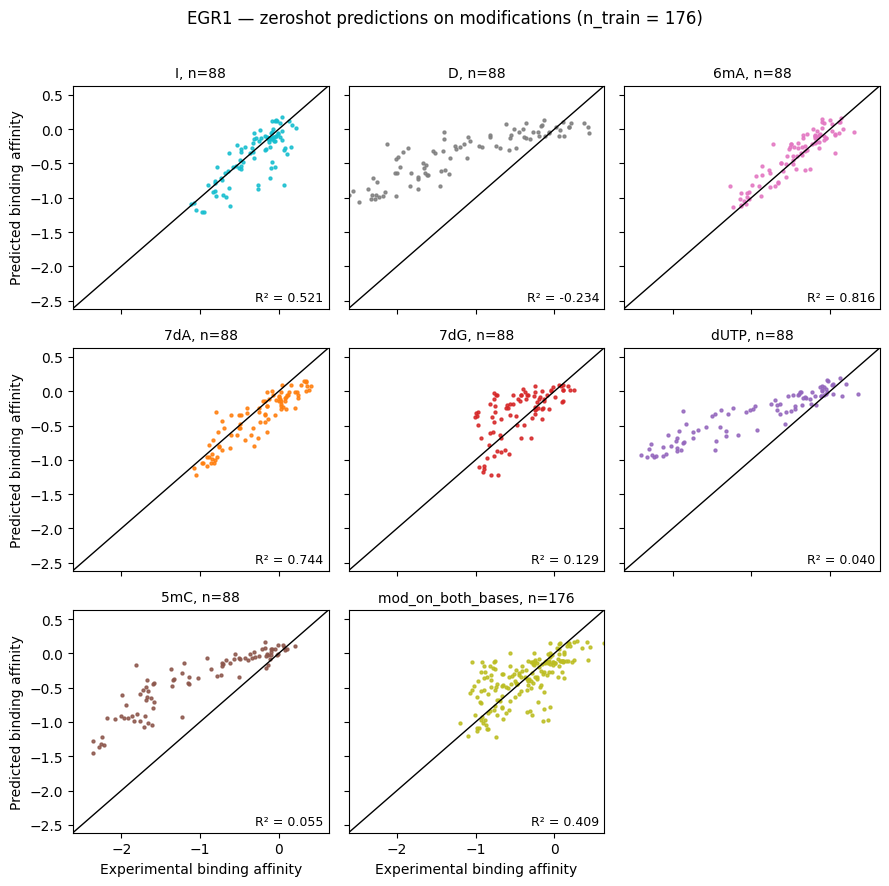

In [202]:
# 3x3 grid of per-category scatter plots with R² annotated
from matplotlib import pyplot as plt

from src.constants import COLOR_MODS

# Use existing color mapping if available; otherwise create a simple one
cats_present = sorted(df_test["Category"].unique().tolist())

order = [c for c in COLOR_MODS.keys() if c in cats_present]
order.extend([c for c in cats_present if c not in order])
colors = {cat: COLOR_MODS.get(cat, None) for cat in order}

# Global axis limits for comparability
p1 = max(df_test["y_pred"].max(), df_test["ln(I)"].max())
p2 = min(df_test["y_pred"].min(), df_test["ln(I)"].min())

fig, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)
axes = axes.ravel()

for i, cat in enumerate(order[:9]):
    ax = axes[i]
    g = df_test[df_test["Category"] == cat]

    ax.scatter(g["ln(I)"], g["y_pred"], s=18, marker='.', alpha=0.85, c=colors.get(cat, None))
    ax.plot([p2, p1], [p2, p1], 'k-', linewidth=1)
    ax.set_xlim([p2, p1])
    ax.set_ylim([p2, p1])

    # Compute R² safely
    try:
        r2_cat = r2_score(g["ln(I)"], g["y_pred"]) if len(g) >= 2 else float("nan")
    except Exception:
        r2_cat = float("nan")

    ax.set_title(f"{cat}, n={len(g)}", fontsize=10)
    ax.text(0.98, 0.02, f"R² = {r2_cat:.3f}" if r2_cat == r2_cat else "R² = N/A",
            transform=ax.transAxes, ha="right", va="bottom",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7), fontsize=9)

# Hide unused subplots if fewer than 9 categories
for j in range(len(order), 9):
    axes[j].axis("off")

# Label only outer axes
for ax in axes[6:9]:
    ax.set_xlabel("Experimental binding affinity")
for ax in axes[::3]:
    ax.set_ylabel("Predicted binding affinity")

fig.suptitle(f"{TF} — zeroshot predictions on modifications (n_train = {len(df_train)})", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save pdf
plt.savefig(f"plots/{TF}_linear_zeroshot_modifications.pdf")


In [203]:
cats_present

['5mC', '6mA', '7dA', '7dG', 'D', 'I', 'dUTP', 'mod_on_both_bases']